In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
from warnings import filterwarnings

In [2]:
mydata=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Supervised-Learning/main/titanic-training-data.csv")

In [3]:
mydata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
mydata.shape

(891, 12)

In [5]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
mydata.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [7]:
mydata.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
mydata.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


<AxesSubplot:xlabel='Survived', ylabel='count'>

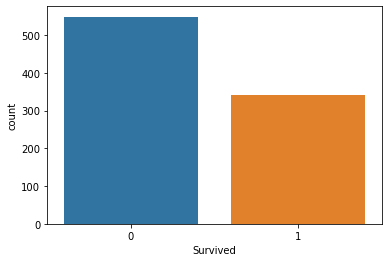

In [9]:
sns.countplot(x="Survived",data=mydata)

<AxesSubplot:xlabel='Survived', ylabel='count'>

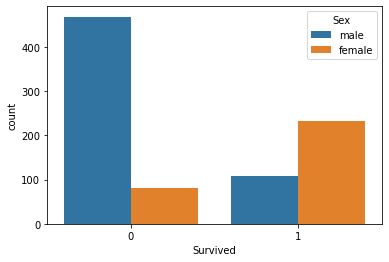

In [10]:
sns.countplot(x="Survived",hue="Sex",data=mydata)

<AxesSubplot:xlabel='Survived', ylabel='count'>

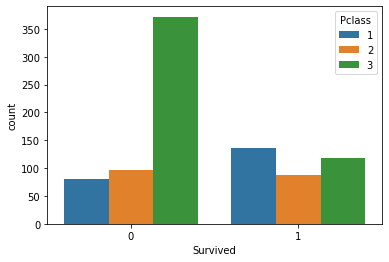

In [11]:
sns.countplot(x="Survived",hue="Pclass",data=mydata)

In [12]:
mydata.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

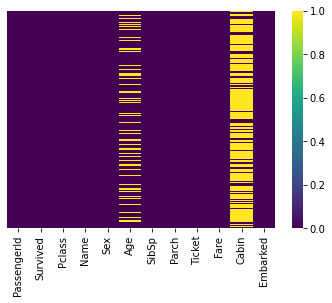

In [13]:
sns.heatmap(mydata.isnull(),yticklabels=False,cmap="viridis")

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

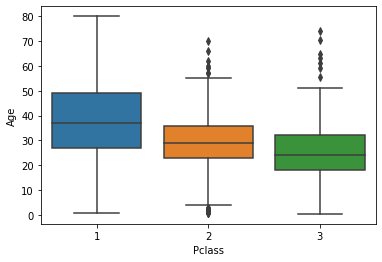

In [14]:
sns.boxplot(x="Pclass",y="Age",data=mydata)

In [15]:
mydata.drop("Cabin",axis=1,inplace=True)

In [19]:
mydata.dropna(inplace=True)

<AxesSubplot:>

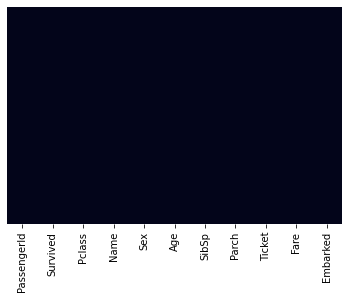

In [22]:
sns.heatmap(mydata.isnull(),yticklabels=False,cbar=False)

In [23]:
mydata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [24]:
Sex=pd.get_dummies(df["Sex"])
Sex.head()

NameError: name 'df' is not defined

In [26]:
Sex=pd.get_dummies(mydata["Sex"],drop_first=True)
Sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [27]:
embark=pd.get_dummies(mydata["Embarked"])
embark.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [28]:
embark=pd.get_dummies(mydata["Embarked"],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [29]:
pcl=pd.get_dummies(mydata["Pclass"],drop_first=True)
pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [30]:
df=pd.concat([mydata,Sex,embark,pcl],axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [31]:
mydata.drop(["Sex","Embarked","PassengerId","Name","Ticket","Pclass","Fare"],axis=1,inplace=True)
mydata.head()

,Survived,Age,SibSp,Parch
0,0,22.0,1,0
1,1,38.0,1,0
2,1,26.0,0,0
3,1,35.0,1,0
4,0,35.0,0,0


In [32]:
X=mydata.drop("Survived",axis=1)
y=mydata["Survived"]

In [33]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

In [34]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [35]:
predictions=model.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.602803738317757

In [37]:
from sklearn import metrics
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.60      0.93      0.73       122
           1       0.65      0.16      0.26        92

    accuracy                           0.60       214
   macro avg       0.62      0.55      0.49       214
weighted avg       0.62      0.60      0.53       214



In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[114,   8],
       [ 77,  15]], dtype=int64)

<AxesSubplot:>

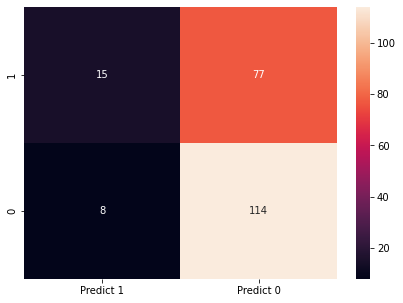

In [40]:
cm=metrics.confusion_matrix(y_test, predictions, labels=[1, 0])

mydata_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(mydata_cm, annot=True,fmt='g')